<a href="https://colab.research.google.com/github/mossytreesandferns/DataCampHomework/blob/master/WorkingWithDatesAndTimesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/DCWorkingWithDatesandTimes/")
os.getcwd()

'/content/gdrive/My Drive/DCWorkingWithDatesandTimes'

# Dates and Calenders

### Dates in Python

In [0]:
import pandas as pd
import datetime
from datetime import date

In [5]:
# What day of the week was Hurricane Andrew?
hurricane = date(1992,8,24)
hurricane.weekday()

0

In [6]:
hurr = pd.read_pickle('florida_hurricane_dates.pkl.txt')
type(hurr)

list

In [7]:
early_hurricanes = 0
for hurricane in hurr:
  if hurricane.month < 6:
    early_hurricanes += 1
print(early_hurricanes)    

10


### Math with dates

In [0]:
# Time deltas give elapsed time between two dates
from datetime import timedelta

In [9]:
# Create a date object for May 9th, 2007
start = date(2007,5,9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
print((end- start).days)

218


In [10]:
# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0,
		  				 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Loop over all hurricanes
for hurricane in hurr:
  # Pull out the month
  month = hurricane.month
  # Increment the count in your dictionary by one
  hurricanes_each_month[month] += 1
  
print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


In [0]:
# Use sorted() to sort list of dates and print desired entries

### Turning dates back into strings

In [0]:
# Turning dates back into strings is necessary when writing to a csv, putting into a file name, or printing date
# ISO 8601 format: YYYY-MM-DD --> .isoformat(), sorted() works well with .isoformat()
# .strftime() %Y%m%d

In [13]:
# Assign the earliest date to first_date
first_date = min(hurr)

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat() # use with date in list so that it will be a string
us = "Our earliest hurricane date: " + first_date.strftime("%Y %m %d")
us2 = "Our earliest hurricane date: " + first_date.strftime("%Y/%m/%d")
print("ISO: " + iso)
print("US: " + us)
print(us2)

ISO: Our earliest hurricane date: 1950-08-31
US: Our earliest hurricane date: 1950 08 31
Our earliest hurricane date: 1950/08/31


In [14]:
# Create a date object
andrew = date(1992, 8, 26)

# Print the date in the format 'YYYY-MM'
print(andrew.strftime('%Y-%m'))

# Print the date in the format 'MONTH (YYYY)'
print(andrew.strftime('%m (%Y)'))
print(andrew.strftime('%B (%Y)')) # strftime cheatsheets online

# Print the date in the format 'YYYY-DDD'
print(andrew.strftime('%Y-%a %b %e'))

1992-08
08 (1992)
August (1992)
1992-Wed Aug 26


# Combining Dates and Times

### Dates and times

In [15]:
# import datetime
from datetime import datetime
# October 1, 2017, 3:23:25 pm
dt = datetime(2017,10,1,15,23,25) # add a half a second by adding 500k microseconds (year=2017,month=10,dat=1,hour=15,minute=23,second=25,microsecond=500000) nanoseconds covered later
print(dt)

2017-10-01 15:23:25


In [16]:
dt_hr = dt.replace(minute=0,second=0,microsecond=0)
print(dt_hr)

2017-10-01 15:00:00


In [17]:
print(dt.isoformat())

2017-10-01T15:23:25


In [18]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017,12,31,15,19,13)

# Print the results in ISO 8601 format
print(dt.isoformat())

2017-12-31T15:19:13


In [19]:
dt_yr = dt.replace(year=1917)
print(dt_yr)

1917-12-31 15:19:13


In [20]:
bikes = pd.read_csv('capital-onebike.csv')
bikes.head(3)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member


In [21]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start date            290 non-null    object
 1   End date              290 non-null    object
 2   Start station number  290 non-null    int64 
 3   Start station         290 non-null    object
 4   End station number    290 non-null    int64 
 5   End station           290 non-null    object
 6   Bike number           290 non-null    object
 7   Member type           290 non-null    object
dtypes: int64(2), object(6)
memory usage: 18.2+ KB


In [22]:
type(bikes['Start date']),type(bikes['End date'])

(pandas.core.series.Series, pandas.core.series.Series)

In [23]:
# Create dictionary to hold results 
bikes['Start date'] = pd.to_datetime(bikes['Start date'])
onebike_datetimes = bikes['Start date'] # Datacamp console has start date and end date loaded as a dictionary
trip_counts = {'AM': 0, 'PM': 0}
  
# Loop over all trips
for trip in onebike_datetimes:
  # Check to see if the trip starts before noon
  if trip.hour < 12:
    # Increment the counter for before noon
    trip_counts['AM'] += 1
  else:
    # Increment the counter for after noon
    trip_counts['PM'] += 1
  
print(trip_counts)

{'AM': 94, 'PM': 196}


### Printing and Parsing Datetimes

In [24]:
dt = datetime(2017,12,30,15,19,13)
print(dt.strftime('%Y-%m-%d'))

2017-12-30


In [25]:
print(dt.strftime('%Y-%m-%d %H:%M:%S'))

2017-12-30 15:19:13


In [26]:
print(dt.isoformat())

2017-12-30T15:19:13


In [27]:
# datetime.strptime(stringtoturnintodate, formatstring)    'string parse time'
dt = datetime.strptime('12/30/2017 15:19:13','%m/%d/%Y %H:%M:%S') #format has to match exactly
type(dt)

datetime.datetime

In [28]:
print(dt)

2017-12-30 15:19:13


In [29]:
# Reading from Unix timestamp (seconds from 1/1/1970)
ts = 1514665153.0
print(datetime.fromtimestamp(ts))

2017-12-30 20:19:13


In [30]:
# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD HH:MM:SS format
s = '2017-02-03 00:00:01'

# Write a format string to parse s
fmt = '%Y-%m-%d %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2017-02-03 00:00:01


In [31]:
# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD format
s = '2030-10-15'

# Write a format string to parse s
fmt = '%Y-%m-%d'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2030-10-15 00:00:00


In [32]:
# Import the datetime class
from datetime import datetime

# Starting string, in MM/DD/YYYY HH:MM:SS format
s = '12/15/1986 08:00:00'

# Write a format string to parse s
fmt = '%m/%d/%Y %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s,fmt)

# Print d
print(d)

1986-12-15 08:00:00


In [0]:
bikes = pd.read_csv('capital-onebike.csv')

In [34]:
tuple_list = zip(bikes['Start date'],bikes['End date'])
#print(next(tuple_list)) don't forget to listify
tuple_list = list(tuple_list)
tuple_list[:10]

[('2017-10-01 15:23:25', '2017-10-01 15:26:26'),
 ('2017-10-01 15:42:57', '2017-10-01 17:49:59'),
 ('2017-10-02 06:37:10', '2017-10-02 06:42:53'),
 ('2017-10-02 08:56:45', '2017-10-02 09:18:03'),
 ('2017-10-02 18:23:48', '2017-10-02 18:45:05'),
 ('2017-10-02 18:48:08', '2017-10-02 19:10:54'),
 ('2017-10-02 19:18:10', '2017-10-02 19:31:45'),
 ('2017-10-02 19:37:32', '2017-10-02 19:46:37'),
 ('2017-10-03 08:24:16', '2017-10-03 08:32:27'),
 ('2017-10-03 18:17:07', '2017-10-03 18:27:46')]

In [35]:
fmt = "%Y-%m-%d %H:%M:%S"
datetime_list = []
# loop over list of tuplefied start and end times
for (start, end) in tuple_list:
  # create dictionary inside of for loop
  trip = {'start': datetime.strptime(start,fmt),
          'end': datetime.strptime(end,fmt)}
  datetime_list.append(trip) 

datetime_list[:5]         

[{'end': datetime.datetime(2017, 10, 1, 15, 26, 26),
  'start': datetime.datetime(2017, 10, 1, 15, 23, 25)},
 {'end': datetime.datetime(2017, 10, 1, 17, 49, 59),
  'start': datetime.datetime(2017, 10, 1, 15, 42, 57)},
 {'end': datetime.datetime(2017, 10, 2, 6, 42, 53),
  'start': datetime.datetime(2017, 10, 2, 6, 37, 10)},
 {'end': datetime.datetime(2017, 10, 2, 9, 18, 3),
  'start': datetime.datetime(2017, 10, 2, 8, 56, 45)},
 {'end': datetime.datetime(2017, 10, 2, 18, 45, 5),
  'start': datetime.datetime(2017, 10, 2, 18, 23, 48)}]

In [36]:
one = datetime_list[0]['start']
fmt = "%Y-%m-%d %H:%M:%S"
print(one.isoformat())
print(one.strftime(fmt))

2017-10-01T15:23:25
2017-10-01 15:23:25


In [37]:
# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 20, 19, 13), datetime.datetime(2017, 12, 30, 20, 9, 3)]


### Working with Durations

In [38]:
start = datetime(2017,10,8,23,46,47)
end = datetime(2017,10,9,0,10,57)
duration = end-start
print(duration)

0:24:10


In [39]:
duration.total_seconds()

1450.0

In [40]:
# Creating a timedelta by hand timedelta(weeks=,days=,hours=,minutes=,seconds=,microseconds=)
#  -timedeltas can be negative
from datetime import timedelta
delta1 = timedelta(seconds=1)
print(start)
print(start + delta1)

2017-10-08 23:46:47
2017-10-08 23:46:48


In [41]:
delta2 = timedelta(days=1, seconds = 2)
print(start)
print(start + delta2)

2017-10-08 23:46:47
2017-10-09 23:46:49


In [42]:
# Initialize a list for all the trip durations
onebike_durations = []

for trip in datetime_list:
  # Create a timedelta object corresponding to the length of the trip
  trip_duration = trip['end'] - trip['start']
  
  # Get the total elapsed seconds in trip_duration
  trip_length_seconds = trip_duration.total_seconds()
  
  # Append the results to our list
  onebike_durations.append(trip_length_seconds)
onebike_durations[:5]  

[181.0, 7622.0, 343.0, 1278.0, 1277.0]

In [43]:
# What was the total duration of all trips?
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)
  
# Divide the total duration by the number of trips to get avg secondsper trip
print(total_elapsed_time / number_of_trips)

1178.9310344827586


In [44]:
# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print("The shortest trip was " + str(shortest_trip) + " seconds")
print("The longest trip was " + str(longest_trip) + " seconds")

The shortest trip was -3346.0 seconds
The longest trip was 76913.0 seconds


# Timezones and Daylight Savings

### UTC offsets

In [45]:
from datetime import datetime, timedelta, timezone
# Eastern standard time
ET = timezone(timedelta(hours=-5))
# Timezone aware datetime
dt = datetime(2017, 10,1,23,15,3,tzinfo=ET) # This recorded time is 5 hours behind UTC
# printing with UTC offset
print(dt)

2017-10-01 23:15:03-05:00


In [46]:
# India standard time
IST = timezone(timedelta(hours=5,minutes=30))
#astimezone() method
print(dt.astimezone(IST))

2017-10-02 09:45:03+05:30


In [47]:
# replace tzinfo:
print(dt.replace(tzinfo=timezone.utc))

# change original to match UTC
print(dt.astimezone(timezone.utc))

2017-10-01 23:15:03+00:00
2017-10-02 04:15:03+00:00


In [48]:
# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))
print(datetime_list[:3])

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in datetime_list[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].astimezone(edt)
  trip['end'] = trip['end'].astimezone(edt)
print(datetime_list[:3])  

[{'start': datetime.datetime(2017, 10, 1, 15, 23, 25), 'end': datetime.datetime(2017, 10, 1, 15, 26, 26)}, {'start': datetime.datetime(2017, 10, 1, 15, 42, 57), 'end': datetime.datetime(2017, 10, 1, 17, 49, 59)}, {'start': datetime.datetime(2017, 10, 2, 6, 37, 10), 'end': datetime.datetime(2017, 10, 2, 6, 42, 53)}]
[{'start': datetime.datetime(2017, 10, 1, 11, 23, 25, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000))), 'end': datetime.datetime(2017, 10, 1, 11, 26, 26, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000)))}, {'start': datetime.datetime(2017, 10, 1, 11, 42, 57, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000))), 'end': datetime.datetime(2017, 10, 1, 13, 49, 59, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000)))}, {'start': datetime.datetime(2017, 10, 2, 2, 37, 10, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000))), 'end': datetime.datetime(2017, 10, 2, 2, 42, 53, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000)))}]


In [49]:

# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in datetime_list[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=edt)
  trip['end'] = trip['end'].replace(tzinfo=edt)
print(datetime_list[:3])  

[{'start': datetime.datetime(2017, 10, 1, 11, 23, 25, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000))), 'end': datetime.datetime(2017, 10, 1, 11, 26, 26, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000)))}, {'start': datetime.datetime(2017, 10, 1, 11, 42, 57, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000))), 'end': datetime.datetime(2017, 10, 1, 13, 49, 59, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000)))}, {'start': datetime.datetime(2017, 10, 2, 2, 37, 10, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000))), 'end': datetime.datetime(2017, 10, 2, 2, 42, 53, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000)))}]


In [50]:
# Loop over the trips
for trip in datetime_list[:10]:
  # Pull out the start and set it to UTC
  dt = trip['start'].replace(tzinfo=timezone.utc)
  
  # Print the start time in UTC
  print('Original:', trip['start'], '| UTC:', dt.isoformat())

Original: 2017-10-01 11:23:25-04:00 | UTC: 2017-10-01T11:23:25+00:00
Original: 2017-10-01 11:42:57-04:00 | UTC: 2017-10-01T11:42:57+00:00
Original: 2017-10-02 02:37:10-04:00 | UTC: 2017-10-02T02:37:10+00:00
Original: 2017-10-02 04:56:45-04:00 | UTC: 2017-10-02T04:56:45+00:00
Original: 2017-10-02 14:23:48-04:00 | UTC: 2017-10-02T14:23:48+00:00
Original: 2017-10-02 14:48:08-04:00 | UTC: 2017-10-02T14:48:08+00:00
Original: 2017-10-02 15:18:10-04:00 | UTC: 2017-10-02T15:18:10+00:00
Original: 2017-10-02 15:37:32-04:00 | UTC: 2017-10-02T15:37:32+00:00
Original: 2017-10-03 04:24:16-04:00 | UTC: 2017-10-03T04:24:16+00:00
Original: 2017-10-03 14:17:07-04:00 | UTC: 2017-10-03T14:17:07+00:00


In [51]:
# Loop over the trips
for trip in datetime_list[:10]:
  # Pull out the start and set it to UTC
  dt = trip['start'].astimezone(timezone.utc)
  
  # Print the start time in UTC
  print('Original:', trip['start'], '| UTC:', dt.isoformat())

Original: 2017-10-01 11:23:25-04:00 | UTC: 2017-10-01T15:23:25+00:00
Original: 2017-10-01 11:42:57-04:00 | UTC: 2017-10-01T15:42:57+00:00
Original: 2017-10-02 02:37:10-04:00 | UTC: 2017-10-02T06:37:10+00:00
Original: 2017-10-02 04:56:45-04:00 | UTC: 2017-10-02T08:56:45+00:00
Original: 2017-10-02 14:23:48-04:00 | UTC: 2017-10-02T18:23:48+00:00
Original: 2017-10-02 14:48:08-04:00 | UTC: 2017-10-02T18:48:08+00:00
Original: 2017-10-02 15:18:10-04:00 | UTC: 2017-10-02T19:18:10+00:00
Original: 2017-10-02 15:37:32-04:00 | UTC: 2017-10-02T19:37:32+00:00
Original: 2017-10-03 04:24:16-04:00 | UTC: 2017-10-03T08:24:16+00:00
Original: 2017-10-03 14:17:07-04:00 | UTC: 2017-10-03T18:17:07+00:00


### Timezone database

In [52]:
from datetime import datetime
from dateutil import tz

# Eastern time
et = tz.gettz('America/New York') # Continent/City

date_object = datetime(2018, 4,6,22,34,12,tzinfo=et)
print(date_object)

2018-04-06 22:34:12-04:00


In [53]:
# Import tz
from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in datetime_list[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=et)
  trip['end'] = trip['end'].replace(tzinfo=et)
datetime_list[:3]  

[{'end': datetime.datetime(2017, 10, 1, 11, 26, 26, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'start': datetime.datetime(2017, 10, 1, 11, 23, 25, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))},
 {'end': datetime.datetime(2017, 10, 1, 13, 49, 59, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'start': datetime.datetime(2017, 10, 1, 11, 42, 57, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))},
 {'end': datetime.datetime(2017, 10, 2, 2, 42, 53, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')),
  'start': datetime.datetime(2017, 10, 2, 2, 37, 10, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))}]

In [54]:
# Create the timezone object
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = datetime_list[0]['start']

# What time was it in the UK?
notlocal = local.replace(tzinfo=uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T11:23:25-04:00
2017-10-01T11:23:25+01:00


In [55]:
# Create the timezone object
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = datetime_list[0]['start']

# What time was it in the UK?
notlocal = local.astimezone(uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T11:23:25-04:00
2017-10-01T16:23:25+01:00


In [56]:
# Create the timezone object
ist = tz.gettz('Asia/Kolkata')

# Pull out the start of the first trip
local = datetime_list[0]['start']

# What time was it in India?
notlocal = local.astimezone(ist)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T11:23:25-04:00
2017-10-01T20:53:25+05:30


In [57]:
# Create the timezone object
sm = tz.gettz('Pacific/Apia')

# Pull out the start of the first trip
local = datetime_list[0]['start']

# What time was it in Samoa?
notlocal = local.astimezone(sm)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T11:23:25-04:00
2017-10-02T05:23:25+14:00


### Starting Daylilght Savings Time

In [58]:
spring_ahead = datetime(2017, 3, 12, 1, 59, 59) # daylight savings begins on east coast
spring_ahead.isoformat()

'2017-03-12T01:59:59'

In [59]:
spring_ahead3 = datetime(2017, 3, 12, 3, 0, 0) # new time
spring_ahead3.isoformat()

'2017-03-12T03:00:00'

In [60]:
(spring_ahead3 - spring_ahead).total_seconds() # no automatic understanding of daylight savings by computer/python

3601.0

In [61]:
from datetime import timezone, timedelta

est = timezone(timedelta(hours=-5))
edt = timezone(timedelta(hours=-4)) # Daylight savings time


spring_ahead.replace(tzinfo=est)
spring_ahead3.replace(tzinfo=edt)
(spring_ahead3 - spring_ahead).seconds # This should be working and it's not...

3601

In [62]:
### Use tz.gettz() to avoid having to look up time differences

from dateutil import tz

eastern = tz.gettz('America/New York')

spring_ahead = datetime(2017, 3, 12, 1, 59, 59, tzinfo = eastern)
spring_ahead3 = datetime(2017, 3, 12, 3, 0, 0, tzinfo = eastern) 

(spring_ahead3 - spring_ahead).seconds # still didn't work

3601

In [63]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00


In [64]:
# How many hours have elapsed?
print((end - start).seconds/(60*60))

6.0


In [65]:
# What if we move to UTC?
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc))\
      .total_seconds()/(60*60))

5.0


In [66]:

# Create starting date
dt = datetime(2000, 3, 29, tzinfo = tz.gettz('Europe/London'))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


### Ending Daylight Savings

In [67]:
# Dealing with 'Fall Backwards'

eastern = tz.gettz('US/Eastern')
first_1am = datetime(2017,11,5,1,0,0, tzinfo=eastern)
tz.datetime_ambiguous(first_1am)

True

In [0]:
second_1am = datetime(2017,11,5,1,0,0, tzinfo=eastern)
second_1am = tz.enfold(second_1am) # enfold() says this date and time belongs to the second instance

In [69]:
(first_1am -second_1am).seconds 

0

In [70]:
(first_1am -second_1am).total_seconds() 

0.0

In [71]:
# Convert to UTC to get accurate absolute elapsed time

first_1am = first_1am.astimezone(tz.UTC) #tz.UTC == timezone.utc
second_1am = second_1am.astimezone(tz.UTC)

(first_1am - second_1am).total_seconds(), (second_1am - first_1am).total_seconds()


(-3600.0, 3600.0)

#### ..... Convert to UTC if you want to do math with time zones

In [72]:
# est = tz.gettz('America/New York')
# for trip in datetime_list:
#   trip['start'] == trip['start'].astimezone(est)
#   trip['end'] == trip['end'].astimezone(est)
# datetime_list[:2]  
type(datetime_list[0]['start'])

datetime.datetime

In [73]:
# Loop over trips
for trip in datetime_list:
  # Rides with ambiguous start
  if tz.datetime_ambiguous(trip['start']):
    print("Ambiguous start at " + str(trip['start']))
  # Rides with ambiguous end 
  if tz.datetime_ambiguous(trip['end']):
    print("Ambiguous end at " + str(trip['end']))  ### THIS WORKS IN DATACAMP CONSOLE

ValueError: ignored

In [74]:
trip_durations = []
for trip in datetime_list:
  # When the start is later than the end, set the fold to be 1
  if trip['start'] > trip['end']:
    trip['end'] = tz.enfold(trip['end']) # enfold before converting to UTC
  # Convert to UTC
  start = trip['start'].astimezone(tz.UTC)
  end = trip['end'].astimezone(tz.UTC)

  # Subtract the difference
  trip_length_seconds = (end-start).total_seconds()
  trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))  #### AGAIN WORKS iN DATACAMP CONSOLE 

Shortest trip: -3346.0


# Dates and Times in Pandas

### Reading Dates and Times in Pandas

In [75]:
import pandas as pd
rides = pd.read_csv('capital-onebike.csv')
rides.head(2)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual


In [76]:
rides.iloc[2]

Start date                               2017-10-02 06:37:10
End date                                 2017-10-02 06:42:53
Start station number                                   31036
Start station                  George Mason Dr & Wilson Blvd
End station number                                     31037
End station             Ballston Metro / N Stuart & 9th St N
Bike number                                           W20529
Member type                                           Member
Name: 2, dtype: object

In [77]:
# Use parse_dates=[datetime columns] when reading in csv to autumatically convert to datetime objects

rides = pd.read_csv('capital-onebike.csv', parse_dates=['Start date','End date'])
rides.head(2)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual


In [78]:
rides['Start date']

0     2017-10-01 15:23:25
1     2017-10-01 15:42:57
2     2017-10-02 06:37:10
3     2017-10-02 08:56:45
4     2017-10-02 18:23:48
              ...        
285   2017-12-29 14:32:55
286   2017-12-29 15:08:26
287   2017-12-29 20:33:34
288   2017-12-30 13:51:03
289   2017-12-30 15:09:03
Name: Start date, Length: 290, dtype: datetime64[ns]

In [79]:
# Manually
rides['Start date'] = pd.to_datetime(rides['Start date'], format = ('%Y-%m-%d %H:%M:%S'))
rides['End date'] = pd.to_datetime(rides['End date'], format = ('%Y-%m-%d %H:%M:%S'))
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2   Start station number  290 non-null    int64         
 3   Start station         290 non-null    object        
 4   End station number    290 non-null    int64         
 5   End station           290 non-null    object        
 6   Bike number           290 non-null    object        
 7   Member type           290 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 18.2+ KB


In [80]:
rides['Start date'].iloc[2]

Timestamp('2017-10-02 06:37:10')

In [81]:
rides['Duration'] = rides['End date'] - rides['Start date']
rides.head(3)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,00:03:01
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,02:07:02
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,00:05:43


In [82]:
rides['Duration'].dt.total_seconds().head()

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

In [83]:
rides['Duration'].mean()

Timedelta('0 days 00:19:38.931034')

In [84]:
rides['Duration'].sum()

Timedelta('3 days 22:58:10')

In [85]:
rides['Duration'].sum()/(timedelta(days=91)) # days out/total days == percent of time bikes were out

0.04348417785917786

In [86]:
rides['Member type'].value_counts()

Member    236
Casual     54
Name: Member type, dtype: int64

In [88]:
rides['Member type'].value_counts()/len(rides) # Percentage each subgroup of bike user is of total number of bike users

Member    0.813793
Casual    0.186207
Name: Member type, dtype: float64

In [0]:
rides['Duration seconds'] = rides['Duration'].dt.total_seconds()

In [94]:
rides.groupby('Member type')['Duration seconds'].mean()

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64

In [95]:
# resample() is a way to group by a datetime time unit for applying aggregation methods

rides.resample('M', on='Start date')['Duration seconds'].mean()

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: M, Name: Duration seconds, dtype: float64

In [96]:
rides.groupby('Member type').size() # size of each group

Member type
Casual     54
Member    236
dtype: int64

In [98]:
rides.groupby('Member type').first() # First instances of subset sliced by groupby()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Duration,Duration seconds
Member type,,,,,,,,,
Casual,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,02:07:02,7622.0
Member,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,00:03:01,181.0


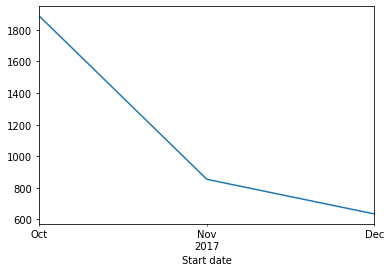

In [100]:
 rides.resample('M', on='Start date')['Duration seconds'].mean().plot() # plotting results by month

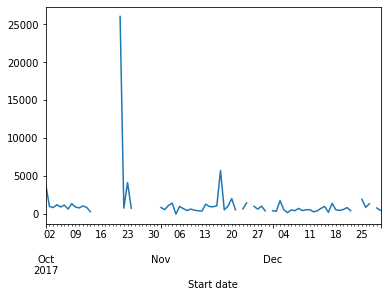

In [101]:
rides.resample('D', on='Start date')['Duration seconds'].mean().plot() # plotting results by day

In [105]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {} seconds" 
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {} seconds"
      .format(rides[joyrides]['Duration'].median()))     # Passing in a slice

6 rides were joyrides
The median duration overall was 0 days 00:11:00 seconds
The median duration for joyrides was 0 days 00:44:02.500000 seconds


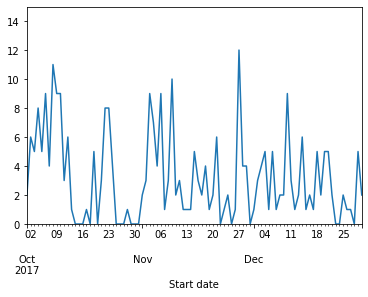

In [106]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
rides.resample('D', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

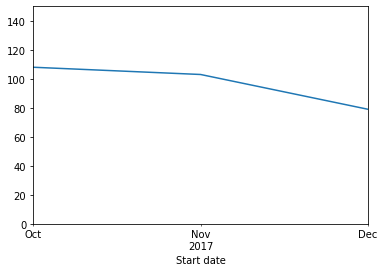

In [107]:
# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

In [108]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on='Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


In [115]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type').resample('M', on='Start date')

# # Print the median duration for each group
# print(grouped['Duration'].median())             #DOES NOT RETURN DATA FRAME THAT CAN HANDLE AGGREGATIONS IN COLAB ENVIRONMENT. Does in Datacamp console.
grouped

### Additional Datetime Methods in Pandas

In [208]:
rides=pd.read_csv('capital-onebike.csv',parse_dates=['Start date','End date'])
rides['Duration'] = rides['End date'] - rides['Start date']
rides.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,00:03:01
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,02:07:02
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,00:05:43
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,00:21:18
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,00:21:17


In [209]:
rides['Duration'].dt.total_seconds().min() # Unreasonable minimum trip length because of daylight savings shift

-3346.0

In [210]:
rides['Start date'].head(3) # checking for a UTC offset

0   2017-10-01 15:23:25
1   2017-10-01 15:42:57
2   2017-10-02 06:37:10
Name: Start date, dtype: datetime64[ns]

In [0]:
# rides['Start date'].head(3).dt.tz_localize('America/New_York') # put entries into desired time zone, note underscore, 

In [0]:
#rides['Start date'].dt.tz_localize('America/New_York') #can't convert whole column because of daylight savings shift in data

In [213]:
rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT') # This code causes dataframe to be converted to a nonetype object
rides['End date'].dt.tz_localize('America/New_York',ambiguous='NaT')

0     2017-10-01 15:26:26-04:00
1     2017-10-01 17:49:59-04:00
2     2017-10-02 06:42:53-04:00
3     2017-10-02 09:18:03-04:00
4     2017-10-02 18:45:05-04:00
                 ...           
285   2017-12-29 14:43:46-05:00
286   2017-12-29 15:18:51-05:00
287   2017-12-29 20:38:13-05:00
288   2017-12-30 13:54:33-05:00
289   2017-12-30 15:19:13-05:00
Name: End date, Length: 290, dtype: datetime64[ns, America/New_York]

In [214]:
rides.head(2)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,00:03:01
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,02:07:02


In [215]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Start date            290 non-null    datetime64[ns] 
 1   End date              290 non-null    datetime64[ns] 
 2   Start station number  290 non-null    int64          
 3   Start station         290 non-null    object         
 4   End station number    290 non-null    int64          
 5   End station           290 non-null    object         
 6   Bike number           290 non-null    object         
 7   Member type           290 non-null    object         
 8   Duration              290 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), object(4), timedelta64[ns](1)
memory usage: 20.5+ KB


In [216]:
rides = rides.drop(columns='Duration', axis=1) # this time inplace=True caused a nonetype error
rides.head(2)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual


In [218]:
# Recalculating trip durations (no -time durations)
rides['Duration'] = rides['End date'] - rides['Start date']
rides['Duration'].dt.total_seconds().min()        # Unreasonable minimum still present

-3346.0

In [231]:
rides[rides['Duration'].dt.total_seconds()==-3346.0].index.values


array([129])

In [241]:
rides.iloc[129] 

Start date              2017-11-05 01:56:50
End date                2017-11-05 01:01:04
Start station number                  31615
Start station                 6th & H St NE
End station number                    31627
End station                   3rd & M St NE
Bike number                          W20529
Member type                          Member
Duration                  -1 days +23:04:14
Name: 129, dtype: object

In [233]:
# Accessing datetimes by parts
rides['Start date'].dt.year.head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: Start date, dtype: int64

In [239]:
rides['Start date'].dt.weekday_name # weekday name doesn't work in this version

AttributeError: ignored

In [240]:
# shifting rows
rides['End date'].shift(1).head(3)

0                   NaT
1   2017-10-01 15:26:26
2   2017-10-01 17:49:59
Name: End date, dtype: datetime64[ns]

In [242]:
# Converting to European/London time

# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', 
                                						 ambiguous='NaT')

# Print first value
print(rides['Start date'].iloc[0])

2017-10-01 15:23:25-04:00


In [244]:
# Converting Time Zones

# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert(
'Europe/London')


# Print the new value
print(rides['Start date'].iloc[0])  # Worked in colab but not datacamp console

2017-10-01 20:23:25+01:00


In [245]:
# How Long per Weekday

# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.weekday_name

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration'].median())

AttributeError: ignored

In [246]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M',on='Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))        # So it comes down to failure to skip ambiguous data

TypeError: ignored

In [0]:
# strptime() strings into dates
# strftime() dates into strings

In [0]:
# Set to UTC at the beginning then back to non-UTC to avoid timezone hiccups

# replace() to replace timezone info but leave original timestamp in place
# astimezone() to change timestamp to new timezone
# dateutil.tz  timezone database

# parse_dates=True, or pd.to_datetime([columns])
# groupby(), resample('unit of time', on=column)
# tz_localize() set new timezone, keep timestamp
# tz_convert() change timestamp